# Drawing a line for the wire and a circle to annotate the tip location

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

directory = os.chdir('C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Images')
for file in os.listdir(directory):
    if file.endswith('.PNG'):
        filename = os.fsdecode(file)
        ground = filename.replace('.PNG' , '.raw.csv')
        img = cv2.imread(filename)
#         print(len(img.shape))
#         img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        mask_dir = 'C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Prep\\'+filename
#         cv2.imwrite(mask_dir, img_gray)
        mask = np.zeros((img.shape[0], img.shape[1], 1), np.uint8)
        tip = np.zeros((img.shape[0], img.shape[1], 1), np.uint8)
        cells = pd.read_csv(ground, sep='\t', header=None , engine = 'python')
        for idx,row in cells.iterrows():
            x1 = row.iloc[0]
            y1 = row.iloc[1]
            x2 = row.iloc[2]
            y2 = row.iloc[3]
            mask = cv2.line(mask, (x1,y1), (x2,y2), color = (255, 255, 255), thickness = 10)
            if x1 > x2 and y1 > y2:
                tip = cv2.circle(tip, center = (x2, y2) , radius = 5, color = (0, 255,255), thickness = -1)
                mask_dir = 'C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Prep\\'+filename
                cv2.imwrite(mask_dir, tip)
            elif x2 > x1 and y2 > y1:
                tip = cv2.circle(tip, center = (x1, y1) , radius = 5, color = (0, 255,255), thickness = -1)
                mask_dir = 'C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Prep\\'+filename
                cv2.imwrite(mask_dir, tip)
            elif x1 > x2 and y2 > y1:
                tip = cv2.circle(tip, center = (x2, y2) , radius = 5, color = (0, 255,255), thickness = -1)
                mask_dir = 'C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Prep\\'+filename
                cv2.imwrite(mask_dir, tip)
            elif x2 > x1 and y1 > y2:
                tip = cv2.circle(tip, center = (x1, y1) , radius = 5, color = (0, 255,255), thickness = -1)
                mask_dir = 'C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Prep\\'+filename
                cv2.imwrite(mask_dir, tip)
        tip = tip[...,2]
        mask = mask[...,2]

In [ ]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import torchvision
from torch.utils.data import Dataset
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
import torchvision.transforms.functional as TF
from torchvision import transforms
import random

directory = os.chdir('C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Mask')

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    #Loading mask 
    mask_img=cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)

    h=mask_img.shape[0]
    w=mask_img.shape[1]

    #Color codes
    colors=[(255 ,0, 0),
            (255,255,255),
            (0,0,0)]

    mapping = {tuple(c): t for c, t in zip(colors, range(len(colors)))}

    mask = torch.zeros(3, h, w, dtype=torch.long)
    target = mask_img
    target=torch.from_numpy(target)
    target = target.permute(2, 0, 1)

    for k in mapping:
        idx = (target==torch.tensor(k, dtype=torch.uint8).unsqueeze(1).unsqueeze(2))
        validx = (idx.sum(0) == 3)  
        mask[validx] = torch.tensor(mapping[k], dtype=torch.long)
    print(f'mask shape: {mask.shape}; class: {mask.unique()}; type: {mask.dtype}') 
# #     plt.imsave('C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Multi\\'+filename, mask)

In [ ]:
from dataloader import dataset
from torch.utils.data import DataLoader
import torch
import numpy as np
import albumentations as A

imagePaths = ['C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Test\\Images\\01824_0000_976x976_16bpp.PNG', 'C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Test\\Images\\01824_0001_976x976_16bpp.PNG']
maskPaths = ['C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Test\\Masks\\01824_0000_976x976_16bpp.PNG', 'C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Test\\Masks\\01824_0001_976x976_16bpp.PNG']

training_dataset = dataset(imagePaths = imagePaths,
                           maskPaths = maskPaths)

training_dataloader = DataLoader(dataset=training_dataset,
                                      batch_size=2,
                                      shuffle=True)
x, y = next(iter(training_dataloader))

print(f'x = shape: {x.shape}; type: {x.dtype}')
print(f'x = min: {x.min()}; max: {x.max()}')
print(f'y = shape: {y.shape}; class: {y.unique()}; type: {y.dtype}')
print(f'y = min: {y.min()}; max: {y.max()}')

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

directory = os.chdir('C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Images')
for file in os.listdir(directory):
    if file.endswith('.PNG'):
        filename = os.fsdecode(file)
        ground = filename.replace('.PNG' , '.raw.csv')
        img = cv2.imread(filename)
        back = np.zeros((img.shape[0], img.shape[1], 3), np.uint8)
        cells = pd.read_csv(ground, sep='\t', header=None , engine = 'python')
        for idx,row in cells.iterrows():
            x1 = row.iloc[0]
            y1 = row.iloc[1]
            x2 = row.iloc[2]
            y2 = row.iloc[3]
            mask = cv2.line(back, (x1,y1), (x2,y2), color = (255, 255, 255), thickness = 10)
            mask_dir = 'C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Masks\\'+filename
            cv2.imwrite(mask_dir, mask)
#             if x1 > x2 and y1 > y2:
#                 tip = cv2.circle(back, center = (x2, y2) , radius = 5, color = (0, 0,255), thickness = -1)
#                 mask_dir = 'C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Masks\\'+filename
#                 cv2.imwrite(mask_dir, tip)
#             elif x2 > x1 and y2 > y1:
#                 tip = cv2.circle(back, center = (x1, y1) , radius = 5, color = (0, 0,255), thickness = -1)
#                 mask_dir = 'C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Masks\\'+filename
#                 cv2.imwrite(mask_dir, tip)
#             elif x1 > x2 and y2 > y1:
#                 tip = cv2.circle(back, center = (x1, y1) , radius = 5, color = (0, 0,255), thickness = -1)
#                 mask_dir = 'C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Masks\\'+filename
#                 cv2.imwrite(mask_dir, tip)
#             elif x2 > x1 and y1 > y2:
#                 tip = cv2.circle(back, center = (x2, y2) , radius = 5, color = (0, 0,255), thickness = -1)
#                 mask_dir = 'C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Masks\\'+filename
#                 cv2.imwrite(mask_dir, tip)    

In [ ]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import torch
import numpy as np
import matplotlib
import cv2
import torchvision.transforms.functional as TF

img = Image.open('C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Mask\\01824_0001_976x976_16bpp.PNG')
pixels = img.load()
for i in range(img.size[0]):
    for j in range(img.size[1]):
        if pixels[i,j] == (225, 225, 225):
            pixels[i,j] = (1)
        elif pixels[i,j] == (255, 0, 0):
            pixels [i,j] = (2)
        elif pixels[i,j] == (0, 0, 0):
            pixels[i,j] = (0)
img.save('C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Test\\Masks\\01824_0001_976x976_16bpp.PNG')
# # Create dummy target image
# nb_classes = 3 - 1 # 2 classes + background
# idx = np.linspace(0., 1., nb_classes)
# cmap = matplotlib.cm.get_cmap('viridis')
# rgb = cmap(idx, bytes=True)[:, :3]  # Remove alpha value

# h, w = 976, 976
# rgb = rgb.repeat(1000, 0)
# target = np.zeros((h*w, 3), dtype=np.uint8)
# target[:rgb.shape[0]] = rgb
# target = target.reshape(h, w, 3)
# target = TF.to_tensor(target)

# plt.imshow(target) # Each class in 10 rows

# cv2.imwrite('C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\trial\\new.PNG', target)

In [ ]:
from PIL import Image
import numpy as np
from torchvision import datasets, transforms
import torch
import cv2

def multiclass_mask(path):
    mask_img=cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    
    h=mask_img.shape[0]
    w=mask_img.shape[1]

    #Color codes
    colors=[[0,0,255],
            [255,255,255],
            [0,0,0]]

    mapping = {tuple(c): t for c, t in zip(colors, range(len(colors)))}

    mask = torch.empty(h, w, dtype=torch.long)
    target = mask_img
    target=torch.from_numpy(target)
    target = target.permute(2, 0, 1)

    for k in mapping:
        idx = (target==torch.tensor(k, dtype=torch.uint8).unsqueeze(1).unsqueeze(2))
        validx = (idx.sum(0) == 3)  
        mask[validx] = torch.tensor(mapping[k], dtype=torch.long)

    return mask

image = Image.open('C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Test\\Images\\01824_0000_976x976_16bpp.PNG').convert('RGB')
mask = Image.open('C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Test\\Masks\\01824_0000_976x976_16bpp.PNG')
# mask = multiclass_mask('C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Test\\Masks\\01824_0000_976x976_16bpp.PNG')
# mask = mask.unsqueeze(0)

img_transform = transforms.Compose([transforms.PILToTensor()])
mask_transform = transforms.Compose([transforms.PILToTensor()])
        
image = img_transform(image).to(torch.float32)
mask = mask_transform(mask).to(torch.long)

print(image.shape, mask.shape)

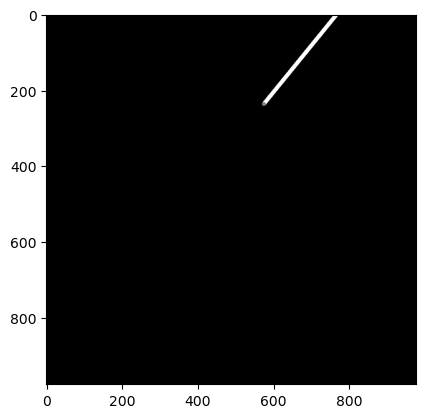

In [27]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

im = Image.open(r"C:\Users\z004b1tz\Desktop\Master Thesis Project\Dataset\Mask\01824_0000_976x976_16bpp.PNG")

mask = np.asarray(im)
mask = mask[:, :, 0].astype(np.uint32) + 256 * mask[:, :, 1].astype(np.uint32) + 65536 * mask[:, :, 2].astype(np.uint32)

mask_background_ind = np.where(mask == 0)
mask_kwire_ind = np.where(mask == 255)
mask_tip_ind = np.where(mask == mask.max())

result = torch.zeros([3, mask.shape[0], mask.shape[1]])

result[0, mask_background_ind[0], mask_background_ind[1]] = 1
result[1, mask_kwire_ind[0], mask_kwire_ind[1]] = 1
result[2, mask_tip_ind[0], mask_tip_ind[1]] = 1

target = torch.argmax(result, dim=0)



In [22]:
from torchvision import transforms

image = Image.open(r"C:\Users\z004b1tz\Desktop\Master Thesis Project\Dataset\Images\01824_0000_976x976_16bpp.PNG")
img_transform = transforms.Compose([transforms.PILToTensor(), 
                                    transforms.Resize((976, 976))])

image = img_transform(image).to(torch.float32)
print(image.shape)

torch.Size([1, 976, 976])


In [16]:
import os
import pandas as pd
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

directory = os.chdir('C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Images')
masks_final = []
for file in os.listdir(directory):
    if file.endswith('.PNG'):
        filename = os.fsdecode(file)
        ground = filename.replace('.PNG' , '.raw.csv')
        img = cv2.imread(filename)
        original_image_shape = img.shape[0], img.shape[1]
        # Load the CSV file into a DataFrame
        cells = pd.read_csv(ground, sep='\t', header=None , engine = 'python')

        # Get the size of the original image
        height, width = original_image_shape
        masks = []
        # Create an empty binary image
        mask = np.zeros((height, width), dtype=np.uint8)
        # Fill in the pixels corresponding to the wire
        for idx,row in cells.iterrows():
            x1 = row.iloc[0]
            y1 = row.iloc[1]
            x2 = row.iloc[2]
            y2 = row.iloc[3]
            mask = cv2.line(mask, (x1,y1), (x2,y2), color = (255, 255, 255), thickness = 10)
            mask = mask / 255.0
            masks.append(mask)

        # convert the masks to a tensor
        masks = torch.tensor(masks, dtype=torch.float32)

        # concatenate the masks along the first dimension
        masks = torch.cat((masks,), dim=0)
        
        masks_final.append(masks)
        
        print(masks.shape)

torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([1, 976, 976])
torch.Size([

KeyboardInterrupt: 

In [12]:
from PIL import Image

image = Image.open('C:\\Users\\z004b1tz\\Desktop\\Master Thesis Project\\Dataset\\Images\\01824_0000_976x976_16bpp.PNG').convert("L")

print(image.size[1])

976


In [17]:
masks_final

[tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
       